In [7]:
import pandas as pd
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
from sklearn.model_selection import train_test_split



path = "./data/gender_voice_dataset.csv"
data = pd.read_csv(path,header=None)
data.shape
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [14]:
#replace all instances of female as 0 and all instances of male as 1
data[20].replace("female", 0,inplace=True)
data[20].replace("male",1,inplace=True)
normD=(data-data.min())/(data.max()-data.min())

train, test = train_test_split(normD, test_size=0.2)
Xtrain=train.loc[:,0:19]
Ytrain=train.loc[:,20]
Xtest=test.loc[:,0:19]
Ytest=test.loc[:,20]
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2952,0.535138,0.542424,0.000679,0.000561,0.000612,0.000345,0.095234,0.022835,0.860598,0.757759,0.000000,0.535138,0.510810,0.000053,0.001061,0.000097,0.000023,0.000034,0.000048,0.000363
139,0.360102,0.605683,0.000389,0.000221,0.000570,0.000739,0.055272,0.004682,0.913518,0.852212,0.000400,0.360102,0.230662,0.000052,0.001314,0.000176,0.000023,0.000210,0.000296,0.000181
1892,0.556314,0.619449,0.000736,0.000376,0.000715,0.000752,0.063047,0.008610,0.917147,0.887313,0.000205,0.556314,0.471569,0.000055,0.001245,0.000189,0.000398,0.000185,0.000258,0.000209
3117,0.867556,0.195095,0.000931,0.000891,0.000824,0.000225,0.042620,0.002218,0.607859,0.150815,0.000846,0.867556,0.486903,0.000270,0.001349,0.000689,0.000133,0.000407,0.000573,0.000192
194,0.526534,0.582684,0.000544,0.000512,0.000691,0.000533,0.078485,0.007814,0.741420,0.710072,0.000587,0.526534,0.376114,0.000126,0.001061,0.000088,0.000086,0.000022,0.000031,0.000257


In [29]:
model = Sequential()
model.add(Dense(200, input_dim=20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [30]:

#Adam=optimizers.Adam(lr=0.01)
Sgd=optimizers.SGD(lr=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=Sgd,
              metrics=['accuracy'])
history=model.fit(Xtrain, Ytrain,
                  epochs=50,
                  batch_size=5,
                  validation_data=(Xtest, Ytest))
scores = model.evaluate(Xtest, Ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Train on 2534 samples, validate on 634 samples
Epoch 1/50
2534/2534 [==============================] - 1s 510us/step - loss: 0.6928 - accuracy: 0.5324 - val_loss: 0.6922 - val_accuracy: 0.4937
Epoch 2/50
2534/2534 [==============================] - 1s 390us/step - loss: 0.6918 - accuracy: 0.6200 - val_loss: 0.6910 - val_accuracy: 0.5678
Epoch 3/50
2534/2534 [==============================] - 1s 396us/step - loss: 0.6903 - accuracy: 0.5797 - val_loss: 0.6890 - val_accuracy: 0.7492
Epoch 4/50
2534/2534 [==============================] - 1s 402us/step - loss: 0.6876 - accuracy: 0.7024 - val_loss: 0.6852 - val_accuracy: 0.7918
Epoch 5/50
2534/2534 [==============================] - 1s 402us/step - loss: 0.6818 - accuracy: 0.7711 - val_loss: 0.6767 - val_accuracy: 0.7918
Epoch 6/50
2534/2534 [==============================] - 1s 402us/step - loss: 0.6679 - accuracy: 0.7999 - val_loss: 0.6548 - val_accuracy: 0.7981
Epoch 7/50
2534/2534 [==============================] - 1s 411us/step - loss:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


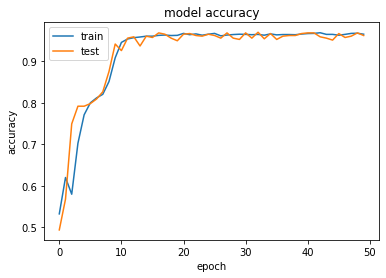

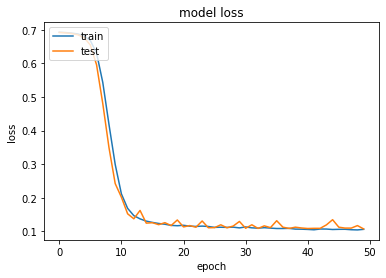

In [31]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
yval = model.predict_classes(Xtest)
print(yval)
for i in range(len(Xtest)):
    print("X {}, real: {} Predicted {}".format(Xtest.iloc[i,1:2],Ytest.iloc[i:1], yval[i]))

[0 0 0 0 1 0 1 2 2 0 1 2 2 0 1 0 1 0 1 2 2 0 1 2 1 1 1 2 0 1]
X sepal-width    0.583333
Name: 28, dtype: float64, real:     class_Iris-setosa  class_Iris-versicolor  class_Iris-virginica
28                1.0                    0.0                   0.0 Predicted 0
X sepal-width    0.916667
Name: 33, dtype: float64, real: Empty DataFrame
Columns: [class_Iris-setosa, class_Iris-versicolor, class_Iris-virginica]
Index: [] Predicted 0
X sepal-width    0.791667
Name: 16, dtype: float64, real: Empty DataFrame
Columns: [class_Iris-setosa, class_Iris-versicolor, class_Iris-virginica]
Index: [] Predicted 0
X sepal-width    0.75
Name: 19, dtype: float64, real: Empty DataFrame
Columns: [class_Iris-setosa, class_Iris-versicolor, class_Iris-virginica]
Index: [] Predicted 0
X sepal-width    0.333333
Name: 54, dtype: float64, real: Empty DataFrame
Columns: [class_Iris-setosa, class_Iris-versicolor, class_Iris-virginica]
Index: [] Predicted 1
X sepal-width    0.583333
Name: 31, dtype: float64, real: 